<a name="A1">
    
# Optimisez la gestion des données d'une boutique - BottleNeck  

 - <a href="#C1"> Opérations préalables </a>
 - <a href="#C2"> Étude export ERP </a>
 - <a href="#C3"> Étude export LIASON </a>
 - <a href="#C4"> Rapprochement ERP-LIAISON </a>
 - <a href="#C5"> Étude export WEB </a>
 - <a href="#C6"> Étude N°1 : Rapprochement ERP-LIAISON-WEB </a> 
 - <a href="#C7"> Étude N°2 : Chiffre d’affaire total et par produit réalisé en ligne </a>
 - <a href="#C8"> Étude N°3 : Traitements des erreurs de saisie dans certains prix des produits </a>


<br/>
    
>>>**Valentin GARCIA**
    
<br/>

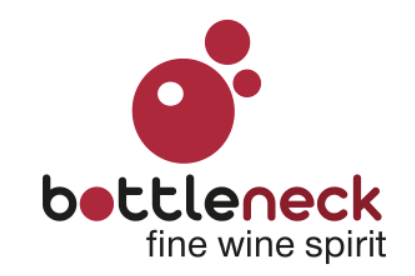

<a name="C1">
<br/> 
----------------------------------------


### Opérations préalables
<br/> 
>>> <a href="#A1"> Retour sommaire

In [1]:
# Importation des librairies utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gestion défaut mineur
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter("ignore")

In [2]:
# Importation fichier xlsx

erp = pd.read_excel('erp.xlsx', engine ='openpyxl')
liaison = pd.read_excel('liaison.xlsx', engine = 'openpyxl')
web = pd.read_excel('web.xlsx', engine = 'openpyxl')

In [3]:
# Création fonctions pour étude dataframe avec boucle

def test_info(dataframe):
    """
    Fonction qui retourne la taille de la Dataframe + la fonction .info()
    """
    print('\nTaille dataframe (Lignes - Colonnes):',dataframe.shape,'\n')
    print('Infos générales :\n')
    dataframe.info()
    
def test_DMU(dataframe):
    """
    Fonction qui retourne les Doublons + valeurs Manquantes + Nb de valeurs Unique de chaque colonne de la Dataframe
    """
    print('\n Test doublons, valeurs manquantes et valeurs unique:')
    for i in range(len(dataframe.columns)):
        doublon = dataframe.duplicated(dataframe.columns[i]).sum()
        vide = dataframe[dataframe.columns[i]].isnull().sum()
        unique = dataframe[dataframe.columns[i]].nunique()
        print('    -> nom de la colonne :  <',dataframe.columns[i],'>  avec',doublon,'doublons et',vide,'valeurs manquantes et'
              ,unique,'valeurs uniques')


<a name="C2">
<br/> 
----------------------------------------


### Étude export ERP
<br/> 
>>> <a href="#A1"> Retour sommaire

In [4]:
test_info(erp)


Taille dataframe (Lignes - Colonnes): (825, 5) 

Infos générales :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
test_DMU(erp)


 Test doublons, valeurs manquantes et valeurs unique:
    -> nom de la colonne :  < product_id >  avec 0 doublons et 0 valeurs manquantes et 825 valeurs uniques
    -> nom de la colonne :  < onsale_web >  avec 823 doublons et 0 valeurs manquantes et 2 valeurs uniques
    -> nom de la colonne :  < price >  avec 444 doublons et 0 valeurs manquantes et 381 valeurs uniques
    -> nom de la colonne :  < stock_quantity >  avec 697 doublons et 0 valeurs manquantes et 128 valeurs uniques
    -> nom de la colonne :  < stock_status >  avec 823 doublons et 0 valeurs manquantes et 2 valeurs uniques


In [6]:
print('Premières constatations :')
print('    -> pas de doublon ni de valeurs manquantes dans product_id')
print('    -> Le type des colonnes semblent correct')
print('    -> Les quantités n\'ont pas de valeurs manquantes \n')
print(' => Le fichier semble exploitable en l\'état')


Premières constatations :
    -> pas de doublon ni de valeurs manquantes dans product_id
    -> Le type des colonnes semblent correct
    -> Les quantités n'ont pas de valeurs manquantes 

 => Le fichier semble exploitable en l'état


<a name="C3">
<br/> 
----------------------------------------


### Étude export LIAISON
<br/> 
>>> <a href="#A1"> Retour sommaire

In [7]:
test_info(liaison)


Taille dataframe (Lignes - Colonnes): (825, 2) 

Infos générales :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [8]:
test_DMU(liaison)


 Test doublons, valeurs manquantes et valeurs unique:
    -> nom de la colonne :  < product_id >  avec 0 doublons et 0 valeurs manquantes et 825 valeurs uniques
    -> nom de la colonne :  < id_web >  avec 90 doublons et 91 valeurs manquantes et 734 valeurs uniques


In [9]:
print('Premières constatations :')
print('    -> la colonne product_id correspond en nombre et en valeurs unique au fichier ERP, soit 825 lignes')
print('    -> la colonne id_web a 91 valeurs manquantes (à étudier) mais que des valeurs uniques \n')
print('    => Le fichier est à étudier pour un rapprochement correcte entre ERP et WEB')

Premières constatations :
    -> la colonne product_id correspond en nombre et en valeurs unique au fichier ERP, soit 825 lignes
    -> la colonne id_web a 91 valeurs manquantes (à étudier) mais que des valeurs uniques 

    => Le fichier est à étudier pour un rapprochement correcte entre ERP et WEB


<a name="C4">
<br/> 
----------------------------------------


### Rapprochement ERP-LIAISON
<br/> 
>>> <a href="#A1"> Retour sommaire

In [10]:
# Jonction externe ERP-LIAISON
erp_liaison = pd.merge(erp , liaison, how = 'outer', on = 'product_id', indicator = True)
erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [11]:
test_info(erp_liaison)


Taille dataframe (Lignes - Colonnes): (825, 7) 

Infos générales :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    int64   
 1   onsale_web      825 non-null    int64   
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   stock_status    825 non-null    object  
 5   id_web          734 non-null    object  
 6   _merge          825 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 46.1+ KB


In [12]:
test_DMU(erp_liaison)


 Test doublons, valeurs manquantes et valeurs unique:
    -> nom de la colonne :  < product_id >  avec 0 doublons et 0 valeurs manquantes et 825 valeurs uniques
    -> nom de la colonne :  < onsale_web >  avec 823 doublons et 0 valeurs manquantes et 2 valeurs uniques
    -> nom de la colonne :  < price >  avec 444 doublons et 0 valeurs manquantes et 381 valeurs uniques
    -> nom de la colonne :  < stock_quantity >  avec 697 doublons et 0 valeurs manquantes et 128 valeurs uniques
    -> nom de la colonne :  < stock_status >  avec 823 doublons et 0 valeurs manquantes et 2 valeurs uniques
    -> nom de la colonne :  < id_web >  avec 90 doublons et 91 valeurs manquantes et 734 valeurs uniques
    -> nom de la colonne :  < _merge >  avec 824 doublons et 0 valeurs manquantes et 1 valeurs uniques


In [13]:
print('Différentes valeurs colonne _MERGE suite à jointure :',erp_liaison['_merge'].unique())

Différentes valeurs colonne _MERGE suite à jointure : ['both']
Categories (3, object): ['left_only', 'right_only', 'both']


In [14]:
print('Il y a', len(erp_liaison.index),'produits dans ce premier fichier de rapporchement')

print('Et nous retrouvons bien', len(erp_liaison[erp_liaison['_merge']=='both']),'jonctions dans ce fichier (avec le comptage des _merge)\n')

# Recherche valeur stock des id impossible à jonctionner
print('De même, nous retrouvons bien les',erp_liaison['id_web'].isnull().sum(),'valeurs manquantes de la colonne id_web')

id_web_manquante = erp_liaison.loc[erp_liaison['id_web'].isnull()]
id_web_manquante['price_stock'] = id_web_manquante['price'] * id_web_manquante['stock_quantity']

print('      -> Soit, valeur du stock impossible à jonctionner :', round(id_web_manquante['price_stock'].sum()),'€')
id_web_manquante_web = id_web_manquante.loc[id_web_manquante['onsale_web'] == 1]
print('      -> Soit, valeur du stock impossible à jonctionner ET avec des ventes sur le web :'
      , round(id_web_manquante_web['price_stock'].sum()),'€ \n')

print('=> CONCLUSION : cette série de 91 valeurs manquantes peut être effacée pour répondre au besoin de l\'étude demandée sur les ventes en ligne')
print('        => Il reste donc',erp_liaison['id_web'].nunique(),'produit possible à mettre en lien avec le fichier WEB')


Il y a 825 produits dans ce premier fichier de rapporchement
Et nous retrouvons bien 825 jonctions dans ce fichier (avec le comptage des _merge)

De même, nous retrouvons bien les 91 valeurs manquantes de la colonne id_web
      -> Soit, valeur du stock impossible à jonctionner : 41001 €
      -> Soit, valeur du stock impossible à jonctionner ET avec des ventes sur le web : 0 € 

=> CONCLUSION : cette série de 91 valeurs manquantes peut être effacée pour répondre au besoin de l'étude demandée sur les ventes en ligne
        => Il reste donc 734 produit possible à mettre en lien avec le fichier WEB


In [15]:
# --------------- Creation df ERP_LIAISON ---------------------------------

erp_liaison_2 = pd.merge(erp , liaison, how = 'outer', on = 'product_id')

# Suppression lignes de id_web manquants
id_web_vide = erp_liaison_2[erp_liaison_2['id_web'].isnull() == True].index
erp_liaison_2.drop(id_web_vide, axis = 0, inplace = True)

# Recherche lignes avec vente en ligne uniquement
erp_liaison_3 = erp_liaison_2.loc[erp_liaison_2['onsale_web'] == 1]

# Changement nom colonne avant jointure avec WEB
erp_liaison_3.rename(columns = {'id_web' : 'sku'} , inplace = True)

erp_liaison_clean = erp_liaison_3

# DF préparée pour jointure avec WEB
erp_liaison_clean

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
787,6930,1,8.4,83,instock,16135
792,7023,1,27.5,15,instock,15891
793,7025,1,69.0,2,instock,15887
822,7247,1,54.8,23,instock,13127-1


<a name="C5">
<br/> 
----------------------------------------


### Étude export WEB
<br/> 
>>> <a href="#A1"> Retour sommaire

In [16]:
test_info(web)


Taille dataframe (Lignes - Colonnes): (1513, 28) 

Infos générales :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64    

In [17]:
test_DMU(web)


 Test doublons, valeurs manquantes et valeurs unique:
    -> nom de la colonne :  < sku >  avec 798 doublons et 85 valeurs manquantes et 714 valeurs uniques
    -> nom de la colonne :  < virtual >  avec 1512 doublons et 0 valeurs manquantes et 1 valeurs uniques
    -> nom de la colonne :  < downloadable >  avec 1512 doublons et 0 valeurs manquantes et 1 valeurs uniques
    -> nom de la colonne :  < rating_count >  avec 1512 doublons et 0 valeurs manquantes et 1 valeurs uniques
    -> nom de la colonne :  < average_rating >  avec 1511 doublons et 83 valeurs manquantes et 1 valeurs uniques
    -> nom de la colonne :  < total_sales >  avec 1471 doublons et 83 valeurs manquantes et 41 valeurs uniques
    -> nom de la colonne :  < tax_status >  avec 1511 doublons et 797 valeurs manquantes et 1 valeurs uniques
    -> nom de la colonne :  < tax_class >  avec 1512 doublons et 1513 valeurs manquantes et 0 valeurs uniques
    -> nom de la colonne :  < post_author >  avec 1510 doublons et 83 val

In [18]:
print('Voici les colonnes qui me semblent importantes à étudier dans le fichier WEB:')

print('    -> pour rapprochement avec ERP   :',web.columns[0])
print('    -> pour nombre de vente          :',web.columns[5])
print('    -> pour doublon ligne            :',web.columns[6],' ou ',web.columns[9],' ou ',web.columns[11],' ou ',web.columns[12])
print('    -> pour vérif sur commentaires   :',web.columns[14])

print('\nNOTA : il semble y avoir', web['sku'].isnull().sum() ,'sku manquant sur les', len(web.index),'lignes totales du fichier')
print('    -> soit', len(web.index) - web['sku'].isnull().sum(),'lignes exploitable pour jointure avec ERP')

Voici les colonnes qui me semblent importantes à étudier dans le fichier WEB:
    -> pour rapprochement avec ERP   : sku
    -> pour nombre de vente          : total_sales
    -> pour doublon ligne            : tax_status  ou  post_date  ou  post_content  ou  post_title
    -> pour vérif sur commentaires   : post_status

NOTA : il semble y avoir 85 sku manquant sur les 1513 lignes totales du fichier
    -> soit 1428 lignes exploitable pour jointure avec ERP


In [19]:
# Création fonction pour DF avec colonne entièrement vide (0 ou NaN traités en même temps sur colonne type float et int)
def test_vide(dataframe):
    liste = []
    colonne = dataframe.select_dtypes(include = ['float64', 'int64'])
    for i , colonne in enumerate(colonne):
        tmp = dataframe[colonne].sum()
        if tmp == 0 :
            liste.append(colonne)
    return liste
      

In [20]:
# Création liste des colonnes vides à l'aide de la fonction
vide = test_vide(web)
print('Liste des colonnes vides du fichier WEB : \n', vide)

# Suppression colonnes vides
web_1 = web.drop(vide , axis = 1)


Liste des colonnes vides du fichier WEB : 
 ['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_class', 'post_content', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'comment_count']


In [21]:
# Suppression lignes Nan
web_2 = web_1.dropna(axis = 0 , how = 'all')


In [22]:
# Traitement Valeurs dans sku
print('Nombre de valeurs manquantes dans SKU :', web_2['sku'].isnull().sum())

# Création DF des sku manquants
sku_vide = web_2[web_2['sku'].isnull() == True]
print('    => Somme des ventes sur les SKU manquants :',sku_vide['total_sales'].sum(),'€')
print('    => Possibilité de suppression des 2 lignes avec SKU manquants sans conséquences pour la suite de l\'étude')

# Suppression lignes avec sku manquant
sku_vide_index = web_2[web_2['sku'].isnull() == True].index
web_3 = web_2.drop(sku_vide_index , axis = 0)


Nombre de valeurs manquantes dans SKU : 2
    => Somme des ventes sur les SKU manquants : 0.0 €
    => Possibilité de suppression des 2 lignes avec SKU manquants sans conséquences pour la suite de l'étude


In [23]:
# Traitement des lignes en double
print('Différentes valeurs dans tax_status :', web_3['tax_status'].unique())
print('    - Nombre de NaN       :', web_3['tax_status'].isnull().sum(), 
      ' -> somme des ventes   :', web_3.loc[web_3['tax_status'].isnull() == True,:]['total_sales'].sum(),'€')
print('    - Nombre de \'taxable\' :', (web_3['tax_status'] == 'taxable').sum(),
      ' -> somme des ventes   :', web_3.loc[web_3['tax_status'] == 'taxable',:]['total_sales'].sum(),'€\n')

print('CONCLUSION : les lignes sont doublées')
print('   => Je choisi de conserver uniquement les valeurs des lignes \'taxable\' de la colonne tax_statues')
print('NOTA : la commande DUPLICTATED me permet de confirmer cela en effectuant une recherche avant et après suppression lignes en doublon')

#a = web_3.loc[web_3['post_date'].duplicated(keep=False),:]    
#a = web_4.loc[web_4['post_date'].duplicated(keep=False),:] 
#print('\n',a)


# Suppression lignes NaN dans tax-status
taxable_vide_index = web_3[web_3['tax_status'].isnull() == True].index
web_4 = web_3.drop(taxable_vide_index , axis = 0)
   

Différentes valeurs dans tax_status : ['taxable' nan]
    - Nombre de NaN       : 714  -> somme des ventes   : 2865.0 €
    - Nombre de 'taxable' : 714  -> somme des ventes   : 2865.0 €

CONCLUSION : les lignes sont doublées
   => Je choisi de conserver uniquement les valeurs des lignes 'taxable' de la colonne tax_statues
NOTA : la commande DUPLICTATED me permet de confirmer cela en effectuant une recherche avant et après suppression lignes en doublon


In [24]:
test_info(web_4)


Taille dataframe (Lignes - Colonnes): (714, 17) 

Infos générales :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         714 non-null    object        
 3   post_author        714 non-null    float64       
 4   post_date          714 non-null    datetime64[ns]
 5   post_date_gmt      714 non-null    datetime64[ns]
 6   post_title         714 non-null    object        
 7   post_excerpt       714 non-null    object        
 8   post_status        714 non-null    object        
 9   comment_status     714 non-null    object        
 10  ping_status        714 non-null    object        
 11  post_name          714 non-null    object        
 12  post_modified      714 non-null    datetime64[ns]


In [25]:
print('Il reste la colonne \'post_mine_type\' en valeurs manquantes (de type objet)')
print('   => Suppression de la colonne pour avoir une Dataframe épurée') 

# Suppression colonne post_mime_type de type 'Objet' et non traité opparavant avec la fonction somme
web_5 = web_4.drop(columns = ['post_mime_type'])


Il reste la colonne 'post_mine_type' en valeurs manquantes (de type objet)
   => Suppression de la colonne pour avoir une Dataframe épurée


In [26]:
print('Résumé du travail de nettoyage de la dataframe WEB')
print('   => Initial                                     : taille =' , web.shape)
print('   => puis suppression colonnes vides             : taille =' , web_1.shape)
print('   => puis suppression lignes vides               : taille =' , web_2.shape)
print('   => puis suppression lignes SKU vides           : taille =' , web_3.shape)
print('   => puis suppression lignes TAX_STATUS vides    : taille =' , web_4.shape)
print('   => puis suppression colonne \'post_mime_type\'   : taille =' , web_5.shape)


Résumé du travail de nettoyage de la dataframe WEB
   => Initial                                     : taille = (1513, 28)
   => puis suppression colonnes vides             : taille = (1513, 17)
   => puis suppression lignes vides               : taille = (1430, 17)
   => puis suppression lignes SKU vides           : taille = (1428, 17)
   => puis suppression lignes TAX_STATUS vides    : taille = (714, 17)
   => puis suppression colonne 'post_mime_type'   : taille = (714, 16)


In [27]:
# Création df WEB_CLEAN avant jonction 
web_clean = web_5

test_info(web_clean)
test_DMU(web_clean)


Taille dataframe (Lignes - Colonnes): (714, 16) 

Infos générales :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         714 non-null    object        
 3   post_author        714 non-null    float64       
 4   post_date          714 non-null    datetime64[ns]
 5   post_date_gmt      714 non-null    datetime64[ns]
 6   post_title         714 non-null    object        
 7   post_excerpt       714 non-null    object        
 8   post_status        714 non-null    object        
 9   comment_status     714 non-null    object        
 10  ping_status        714 non-null    object        
 11  post_name          714 non-null    object        
 12  post_modified      714 non-null    datetime64[ns]


<a name="C6">
<br/> 
----------------------------------------


### Étude N°1 : Rapprochement ERP-LIAISON-WEB
<br/> 
>>> <a href="#A1"> Retour sommaire

In [28]:
# Jointure
erp_liaison_web = pd.merge(erp_liaison_clean , web_clean, how = 'outer', on = 'sku', indicator = True)


In [29]:
test_info(erp_liaison_web)
test_DMU(erp_liaison_web)


Taille dataframe (Lignes - Colonnes): (714, 22) 

Infos générales :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   sku                714 non-null    object        
 6   total_sales        714 non-null    float64       
 7   tax_status         714 non-null    object        
 8   post_author        714 non-null    float64       
 9   post_date          714 non-null    datetime64[ns]
 10  post_date_gmt      714 non-null    datetime64[ns]
 11  post_title         714 non-null    object        
 12  post_excerpt       714 non-null    object        


In [30]:
# Vérif jonction avec _merge
erp_liaison_web['_merge'].unique()


['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [31]:
# Vérif sur df erp_liaison_web['onsale_web'] si tout produit en ligne
erp_liaison_web['onsale_web'].unique()


array([1], dtype=int64)

In [32]:
#erp_liaison_web

<a name="C7">
<br/> 
----------------------------------------


### Étude N°2 : Chiffre d’affaire total et par produit réalisé en ligne
<br/> 
>>> <a href="#A1"> Retour sommaire

In [33]:
# Création colonne CA par produit
erp_liaison_web['CA'] = erp_liaison_web['price'] * erp_liaison_web['total_sales']

# Présentation DF pour CA par produit
ca_produit = erp_liaison_web.loc[:,['sku','product_id','price','total_sales','CA','post_excerpt']]
ca_produit.columns = ['Référence WEB (sku)' , 'Référence ERP', 'Prix unitaire', 'Nombre de vente','CA par produit','Commentaires']
ca_produit['Nombre de vente'] = ca_produit['Nombre de vente'].astype(int)
ca_produit


,Référence WEB (sku),Référence ERP,Prix unitaire,Nombre de vente,CA par produit,Commentaires
0,15298,3847,24.2,6,145.2,"Il exhale un nez subtil, racé avec du poivre f..."
1,15296,3849,34.3,0,0.0,Les vieilles vignes lui apportent une rare pro...
2,15300,3850,20.8,0,0.0,"Dentelle de fruit de jeunes syrah, aux tanins ..."
3,19814,4032,14.1,3,42.3,Gamine représente tout le fruité et la gourman...
4,19815,4039,46.0,0,0.0,Le côte rôtie Carmina monte en puissance mais ...
...,...,...,...,...,...,...
709,16135,6930,8.4,5,42.0,Belle robe jeune à dominante rubis soutenue. N...
710,15891,7023,27.5,0,0.0,L'exotisme du nez est complété par d'élégantes...
711,15887,7025,69.0,0,0.0,"Pour cette cuvée, Jean-Paul Jamet recherche un..."
712,13127-1,7247,54.8,0,0.0,"Nez gracieux, très élégant avec une touche flo..."


In [34]:
# Calcul CA total
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')
print('--------------- CA total de Bottleneck :', erp_liaison_web['CA'].sum() , '€ ---------------')
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')

------------------------------------------------------------------
------------------------------------------------------------------
--------------- CA total de Bottleneck : 70568.6 € ---------------
------------------------------------------------------------------
------------------------------------------------------------------


<a name="C8">
<br/> 
----------------------------------------


### Étude N°3 : Traitements des erreurs de saisie dans certains prix des produits
<br/> 
>>> <a href="#A1"> Retour sommaire

In [35]:
print('-------------------------------------------------------------')
print('--------- Analyse univariée (sur un seule variable)----------')
print('-------------------------------------------------------------')
print('----- \'Prix unitaire\' (variable quantitative continue) ------')
print('-------------------------------------------------------------')
print('------------------ Recherche des OUTLIERS -------------------')
print('-------------------------------------------------------------')

-------------------------------------------------------------
--------- Analyse univariée (sur un seule variable)----------
-------------------------------------------------------------
----- 'Prix unitaire' (variable quantitative continue) ------
-------------------------------------------------------------
------------------ Recherche des OUTLIERS -------------------
-------------------------------------------------------------


In [36]:
# Différentes approches pour la détection des outliers

In [37]:
# Premier test sur Prix unitaire
ca_produit['Prix unitaire'].describe()


count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: Prix unitaire, dtype: float64

In [38]:
# Orientation DF par prix unitaire décroissant pour vérif commentaire sur les Outliers Haut

ca_produit_decroissant = ca_produit.sort_values('Prix unitaire', ascending = False)

print('------------   Vérification des commentaires sur les prix unitaires élevés   ---------------------\n')
ca_produit_decroissant.head(10)


------------   Vérification des commentaires sur les prix unitaires élevés   ---------------------



,Référence WEB (sku),Référence ERP,Prix unitaire,Nombre de vente,CA par produit,Commentaires
199,15940,4352,225.0,5,1125.0,Issu d’un assemblage de 70% de Pinot Noir du g...
426,14581,5001,217.5,0,0.0,Robe cerise chatoyante. Un nez de fruits rouge...
587,14983,5892,191.3,3,573.9,Cet Ambonnay évoque les grands Pinots Noirs de...
218,3510,4402,176.0,13,2288.0,La cuvée VIP XO à été enrichie d’eaux-de-vie t...
553,15185,5767,175.0,0,0.0,<div>Ce vin provient de vignes âgées de 50 ans...
221,7819,4406,157.0,0,0.0,Eau-de-Vie distillée à partir de raisins de Gr...
381,14220,4904,137.0,5,685.0,"Ce Corton Charlemagne éblouit par son assise, ..."
642,14923,6126,135.0,2,270.0,Une robe somptueuse a la teinte jaune pâle eti...
201,12589,4355,126.5,11,1391.5,Le Blanc de Noirs représente le meilleur du sa...
511,14915,5612,124.8,0,0.0,"Né sur un sol marno-gréseux, ce Furstentum est..."


In [39]:
# Analyse interquartile
Q1 = round(np.percentile(ca_produit['Prix unitaire'],25),1)
Q3 = round(np.percentile(ca_produit['Prix unitaire'],75),1)

print('Premier quartile Q1 =',Q1)
print('Troisème quartile Q3 =',Q3)

Premier quartile Q1 = 14.1
Troisème quartile Q3 = 42.2


In [40]:
# Vérif nombre de vente et CA avec intervalle interquantile
print('-----------------------  Analyse Prix unitaire par rapport au Nb de vente et CA  ---------------------------\n')
print('Nombre de vente total :', round(ca_produit['Nombre de vente'].sum()))
print('Pour mémoire, le CA est de :', round(erp_liaison_web['CA'].sum()),'€')

print('  -> Nombre de vente inférieur à Q1 :',round(ca_produit.loc[ca_produit['Nombre de vente'] < Q1]['Nombre de vente'].sum()),
      '(',
      round(ca_produit.loc[ca_produit['Nombre de vente'] < Q1]['Nombre de vente'].sum() / ca_produit['Nombre de vente'].sum() * 100),
      '% des ventes)',
      '  soit  ',
      round(ca_produit.loc[ca_produit['Nombre de vente'] < Q1]['CA par produit'].sum()),'€ de CA',
     '(',
      round(ca_produit.loc[ca_produit['Nombre de vente'] < Q1]['CA par produit'].sum() / erp_liaison_web['CA'].sum() *100),
      '% du CA Total )')

print('  -> Nombre de vente supérieur à Q3 :',round(ca_produit.loc[ca_produit['Nombre de vente'] > Q3]['Nombre de vente'].sum()),
      ' (',
      round(ca_produit.loc[ca_produit['Nombre de vente'] > Q3]['Nombre de vente'].sum() / ca_produit['Nombre de vente'].sum() * 100),
      '% des ventes)',
      '  soit  ',
      round(ca_produit.loc[ca_produit['Nombre de vente'] > Q3]['CA par produit'].sum()),'€ de CA',
      '(',
      round(ca_produit.loc[ca_produit['Nombre de vente'] > Q3]['CA par produit'].sum() / erp_liaison_web['CA'].sum() *100),
      '% du CA Total ) \n')


print('CONCLUSION : On constate que pour l\'analyse de la variable \'Prix unitaire\', le premier quartile', 
      'est plus largement\nreprésenté en terme de nombre de vente et de chiffre d\'affaire \n')


-----------------------  Analyse Prix unitaire par rapport au Nb de vente et CA  ---------------------------

Nombre de vente total : 2865
Pour mémoire, le CA est de : 70569 €
  -> Nombre de vente inférieur à Q1 : 1497 ( 52 % des ventes)   soit   38183 € de CA ( 54 % du CA Total )
  -> Nombre de vente supérieur à Q3 : 334  ( 12 % des ventes)   soit   10508 € de CA ( 15 % du CA Total ) 

CONCLUSION : On constate que pour l'analyse de la variable 'Prix unitaire', le premier quartile est plus largement
représenté en terme de nombre de vente et de chiffre d'affaire 



-----------------------  Mesure de la tendance centrale  ---------------------------

  - Le mode     : 19.0 €
  - La moyenne  : 32.5 €
  - La médiane  : 23.6 €

-> Le mode nous indique que les articles s'achète la plupart du temps autour des 19€ (effectif le plus grand)
-> Le moyenne est sensible aux valeurs extrèmes (ici hautes) car la médiane est bien inférieure à celle-ci 

=> Ce que l'on peut constater avec la distribution empirique (ici histogramme) ci-après : 



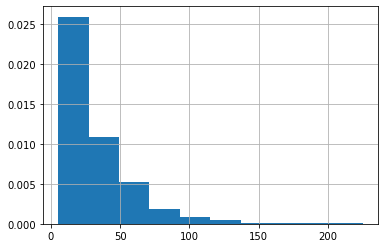

In [41]:
# Mesure de tendance centrale
print('-----------------------  Mesure de la tendance centrale  ---------------------------\n')
print('  - Le mode     :',ca_produit['Prix unitaire'].mode()[0],'€')
print('  - La moyenne  :',round(ca_produit['Prix unitaire'].mean(),1),'€')
print('  - La médiane  :',round(ca_produit['Prix unitaire'].median(),1),'€')

print('\n-> Le mode nous indique que les articles s\'achète la plupart du temps autour des 19€ (effectif le plus grand)')
print('-> Le moyenne est sensible aux valeurs extrèmes (ici hautes) car la médiane est bien inférieure à celle-ci \n')

# Histogramme pour représentation empirique d'une variable continue
print('=> Ce que l\'on peut constater avec la distribution empirique (ici histogramme) ci-après : \n')
ca_produit['Prix unitaire'].hist(density = True)
plt.show()

----------------------------  Mesure de dispersion  ---------------------------------

  - La variance       : 772.3
  - L'écart-type      : 27.8
  - Coef de variation : 0.86

-> Nous avons vu que la moyenne est sensible aux valeurs extrèmes, ici hautes (pour mémoire, moyenne = 32.5 €)
-> L'écart type, nous donne les variations des prix unitaires par rapport à cette moyenne (soit ici : 27.8 €)
-> Le coef de variation (CV) est intéréssant car il est sans unité et s'exprime en pourcentage (ici : 86 %)
    => Nous avons ici un CV élevé, ce qui indique une dispersion importante autour de la moyenne

=> Nous pouvons constater avec le boxplot ci-après (distribution empirique): 



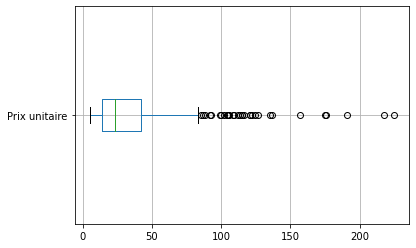

In [42]:
# Mesure de dispersion
print('----------------------------  Mesure de dispersion  ---------------------------------\n')
print('  - La variance       :',round(ca_produit['Prix unitaire'].var(ddof=0),1))
print('  - L\'écart-type      :',round(ca_produit['Prix unitaire'].std(),1))
print('  - Coef de variation :',round((ca_produit['Prix unitaire'].std() / ca_produit['Prix unitaire'].mean()),2))

print('\n-> Nous avons vu que la moyenne est sensible aux valeurs extrèmes, ici hautes (pour mémoire, moyenne =',
      round(ca_produit['Prix unitaire'].mean(),1),'€)')
print('-> L\'écart type, nous donne les variations des prix unitaires par rapport à cette moyenne (soit ici :',
      round(ca_produit['Prix unitaire'].std(),1),'€)')
print('-> Le coef de variation (CV) est intéréssant car il est sans unité et s\'exprime en pourcentage (ici :',
      round((ca_produit['Prix unitaire'].std() / ca_produit['Prix unitaire'].mean() * 100)),'%)')
print('    => Nous avons ici un CV élevé, ce qui indique une dispersion importante autour de la moyenne')


print('\n=> Nous pouvons constater avec le boxplot ci-après (distribution empirique): \n')
ca_produit.boxplot('Prix unitaire', vert = False)
plt.show()

In [43]:
# Mesure de forme
print('----------------------------  Mesure de forme  ---------------------------------\n')

print('  - Coef de Skewness  :',round(ca_produit['Prix unitaire'].skew(),1))

print('\n-> Le résultat du coef de Skewness confirme ce que observé auparavant : distribution étalée à gauche (vers les petits prix unitaire)')
print('-> Ici, coef de Kurtosis (applatissement) est non interprétable car distribution non symetrique ( à titre indicatif :',
      round(ca_produit['Prix unitaire'].kurtosis(),1) ,')')

----------------------------  Mesure de forme  ---------------------------------

  - Coef de Skewness  : 2.6

-> Le résultat du coef de Skewness confirme ce que observé auparavant : distribution étalée à gauche (vers les petits prix unitaire)
-> Ici, coef de Kurtosis (applatissement) est non interprétable car distribution non symetrique ( à titre indicatif : 10.1 )


Nous avions comme premier quartile Q1 = 14.1 € et comme trosième quartile = 42.2 €
   -> Le calcul de 1,5 fois l'écart interquantile nous donne comme borne : -28 € et 84 €
   -> Les Outliers des prix unitaire se situeront donc uniquement après le borne haut de 84  €

Autre forme possile de distribution empirique -> diagramme de dispersion (Prix unitaire en ordonnée et index en abscisse):
    => En rouge, nous voyons donc les Outliers


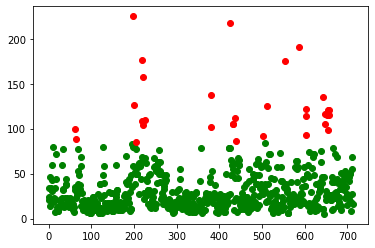

In [44]:
# Calcul de l'écart interquartile
IQ = Q3 - Q1

# Borne du Boxplot (1,5 fois l'écart interquartile)
B1 = Q1 - 1.5 * IQ
B3 = Q3 + 1.5 * IQ

print('Nous avions comme premier quartile Q1 =',Q1, '€ et comme trosième quartile =',Q3,'€')
print('   -> Le calcul de 1,5 fois l\'écart interquantile nous donne comme borne :',round(B1),'€ et',round(B3),'€')
print('   -> Les Outliers des prix unitaire se situeront donc uniquement après le borne haut de',round(B3),' €\n')

# Création de 2 dataframe pour prix unitaire dans le 'boxplot' ou en dehors (= outliers)
PU_box = ca_produit[(ca_produit['Prix unitaire'] <= B3) & (ca_produit['Prix unitaire'] >= B1)]
PU_outliers = ca_produit[(ca_produit['Prix unitaire'] > B3) | (ca_produit['Prix unitaire'] < B1)]

# Graphique en nuage de points des prix unitaires par rapport à leurs index
print('Autre forme possile de distribution empirique -> diagramme de dispersion (Prix unitaire en ordonnée et index en abscisse):')
print('    => En rouge, nous voyons donc les Outliers')
plt.scatter(PU_box['Prix unitaire'].index, PU_box['Prix unitaire'].values, c = 'green')
plt.scatter(PU_outliers['Prix unitaire'].index, PU_outliers['Prix unitaire'].values, c = 'red')
plt.show()

In [45]:
# Calcul du nombre de données atypiques

valeurs_atypiques = ca_produit.loc[ca_produit['Prix unitaire'] > B3]
valeurs_atypiques = valeurs_atypiques.sort_values('Prix unitaire', ascending = True)

print('\n Le nombre de Outliers est de',len(valeurs_atypiques), 'en voici la liste :\n')

valeurs_atypiques



 Le nombre de Outliers est de 32 en voici la liste :



,Référence WEB (sku),Référence ERP,Prix unitaire,Nombre de vente,CA par produit,Commentaires
205,13853,4359,85.6,1,85.6,Belle maîtrise de ce millésime compliqué en Ch...
438,13913,5026,86.8,0,0.0,"Légèrement praliné au nez, nerveux, frais, inc..."
65,11668,4132,88.4,0,0.0,Le nez dévoile déjà une belle intensité de fru...
502,19822,5565,92.0,0,0.0,"<div id=""wrapper"">\n<div id=""container-wrapper..."
602,14774,5916,93.0,0,0.0,"305 bouteilles, 13 ans d'âge.\n\n<span title=""..."
655,11601,6214,99.0,0,0.0,La couleur rouge intense annonce un belle conc...
63,15382,4115,100.0,0,0.0,"Le nez est puissant, dominant, riche, sur la f..."
380,14805,4903,102.3,0,0.0,Ce vin exhale de beaux arômes de fruits rouges...
222,3509,4407,104.0,1,104.0,Ce cognac bénéficie d'un vieillissement plus l...
432,11602,5008,105.0,0,0.0,"""Il s'agit là de la meilleure partie de l'appe..."


In [46]:
print('\n----------------------------  Interpretation OUTLIERS  ---------------------------------\n')

print('Au vu des éléments précedements étudiés :')
print('  => nous pouvons parler de valeurs Atypiques et non de valeurs Aberrantes \n')
print('----------------------------------------------------------------------------------------\n')


----------------------------  Interpretation OUTLIERS  ---------------------------------

Au vu des éléments précedements étudiés :
  => nous pouvons parler de valeurs Atypiques et non de valeurs Aberrantes 

----------------------------------------------------------------------------------------



----------------------------  Analyse de concentration  ---------------------------------

 -> Courbe de Lorenz (en bleue) ci-après 

Explication : plus la courbe de Lorenz est proche de la première bissectrice (en orange) plus la répartition est égalitaire
 -> Ce qui n'est pas le cas ici 

Inégalité confirmée par l'indice de Gini : 0.41 (indice entre 0 et 1) 
  -> on est relativement éloigné du zéro (zéro étant une répartion parfaite) 



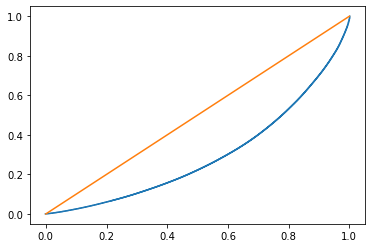

In [47]:
# Courbe de Lorenz
print('----------------------------  Analyse de concentration  ---------------------------------\n')
print(' -> Courbe de Lorenz (en bleue) ci-après \n')

a = ca_produit['Prix unitaire'].values
long = len(a)
lorenz = np.cumsum(np.sort(a)) / a.sum()
lorenz = np.append([0],lorenz) 
xaxis = np.linspace(0-1 / long, 1+1 / long, long + 1)
plt.plot(xaxis , lorenz , drawstyle = 'steps-post')
plt.plot([0,1], [0,1])

print('Explication : plus la courbe de Lorenz est proche de la première bissectrice (en orange) plus la répartition est égalitaire')
print(' -> Ce qui n\'est pas le cas ici \n')

# Calcul indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 - lorenz[0]/2) / long 
S = 0.5 - AUC 
gini = 2*S


print('Inégalité confirmée par l\'indice de Gini :', round(gini,2),
      '(indice entre 0 et 1) \n  -> on est relativement éloigné du zéro (zéro étant une répartion parfaite) \n')


In [48]:

# Mesure du z-score
print('-------------------------------  Analyse du z-score  ----------------------------------')
print('----------------------------  Recherche des outliers  ---------------------------------\n')

print('   -> formule : z-score = (valeur i - moyenne) / écart-type \n')
print('Pour une distribution normale, on estime que : \n',
      '   68 % des points de données se situent entre +/- 1 écart type \n',
      '   95 % des points de données se situent entre +/- 2 écarts-types \n',
      '   99,7 % des points de données se situent entre +/- 3 écarts-types \n')

# Valeur etrème
z_score_3 = 3
outliers_3 = []
for i in a:
    z_score = (i - ca_produit['Prix unitaire'].mean()) / ca_produit['Prix unitaire'].std()
    if abs(z_score) > z_score_3:
        outliers_3.append(i)
outliers_3 = np.sort(outliers_3)        
print('Voici les', len(outliers_3), 'valeurs extrèmes supérieures à 99,7 % d\'une répartition de la loi normale : \n', outliers_3,'\n')


z_score_2 = 2
outliers_2 = []
for i in a:
    z_score = (i - ca_produit['Prix unitaire'].mean()) / ca_produit['Prix unitaire'].std()
    if abs(z_score) > z_score_2:
        outliers_2.append(i)
outliers_2 = np.sort(outliers_2)
print('Pour information, il y a',len(outliers_2),'prix unitaire qui dépasse les +/- 2 écarts-types de la loi normale\n',
     '   -> soit',len(ca_produit['Prix unitaire']) - len(outliers_2), 'produit à l\'intérieur des +/- 2 écarts-types de la courbe de Gauss \n')


z_score_1 = 1
outliers_1 = []
for i in a:
    z_score = (i - ca_produit['Prix unitaire'].mean()) / ca_produit['Prix unitaire'].std()
    if abs(z_score) > z_score_1:
        outliers_1.append(i)
outliers_1 = np.sort(outliers_1)
print('Pour information, il y a',len(outliers_1),'prix unitaire qui dépasse les +/- 1 écarts-types de la loi normale\n',
     '   -> soit',len(ca_produit['Prix unitaire']) - len(outliers_1), 'produit à l\'intérieur des +/- 1 écarts-types de la courbe de Gauss')





-------------------------------  Analyse du z-score  ----------------------------------
----------------------------  Recherche des outliers  ---------------------------------

   -> formule : z-score = (valeur i - moyenne) / écart-type 

Pour une distribution normale, on estime que : 
    68 % des points de données se situent entre +/- 1 écart type 
    95 % des points de données se situent entre +/- 2 écarts-types 
    99,7 % des points de données se situent entre +/- 3 écarts-types 

Voici les 14 valeurs extrèmes supérieures à 99,7 % d'une répartition de la loi normale : 
 [116.4 121.  121.  122.  124.8 126.5 135.  137.  157.  175.  176.  191.3
 217.5 225. ] 

Pour information, il y a 30 prix unitaire qui dépasse les +/- 2 écarts-types de la loi normale
    -> soit 684 produit à l'intérieur des +/- 2 écarts-types de la courbe de Gauss 

Pour information, il y a 80 prix unitaire qui dépasse les +/- 1 écarts-types de la loi normale
    -> soit 634 produit à l'intérieur des +/- 1 écart

In [49]:
import scipy.stats as stats

print('----------------------------  Affiche de tous les z-score  ---------------------------------\n')

aa = stats.zscore(a)
aa = np.sort(aa)
aa


----------------------------  Affiche de tous les z-score  ---------------------------------



array([-9.82083951e-01, -9.64092543e-01, -9.64092543e-01, -9.64092543e-01,
       -9.64092543e-01, -9.60494261e-01, -9.60494261e-01, -9.60494261e-01,
       -9.60494261e-01, -9.42502853e-01, -9.35306290e-01, -9.35306290e-01,
       -9.35306290e-01, -9.28109726e-01, -9.24511445e-01, -9.24511445e-01,
       -9.17314881e-01, -9.17314881e-01, -9.13716600e-01, -9.13716600e-01,
       -9.13716600e-01, -9.10118318e-01, -9.02921755e-01, -9.02921755e-01,
       -8.99323473e-01, -8.95725191e-01, -8.95725191e-01, -8.92126910e-01,
       -8.88528628e-01, -8.88528628e-01, -8.84930346e-01, -8.84930346e-01,
       -8.77733783e-01, -8.74135501e-01, -8.66938938e-01, -8.63340656e-01,
       -8.63340656e-01, -8.59742375e-01, -8.59742375e-01, -8.56144093e-01,
       -8.56144093e-01, -8.56144093e-01, -8.56144093e-01, -8.56144093e-01,
       -8.48947530e-01, -8.48947530e-01, -8.48947530e-01, -8.45349248e-01,
       -8.45349248e-01, -8.41750966e-01, -8.41750966e-01, -8.38152685e-01,
       -8.34554403e-01, -